# Домашнее задание

- Скачайте текст войны и мир (ссылка на [github](https://github.com/netology-code/ds3-spring-2018/tree/master/7.%20Time_series/7.4/war_and_peace) и [гугл диск](https://drive.google.com/drive/u/2/folders/1aM7cNI6Qs7AyeYpQ8lNg7vLsHzIl0JbU)). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
- [Выберите ряд](https://datamarket.com/data/list/?q=cat:fpg%20provider:tsdl) и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from hmmlearn.hmm import GaussianHMM
%matplotlib inline
sns.set()

In [45]:
# !pip install hmmlearn

In [2]:
#соберем все тома Войны и мира в 1 книгу
with open ('all_text.txt','w',encoding='utf-8') as output:
    for file in ['tom_1.txt','tom_2.txt','tom_3.txt','tom_4.txt']:
        with open(file,'r',encoding='utf-8') as file:
            for line in file:
                output.write(line)
            output.write('\n')

In [3]:
with open('all_text.txt', 'r',encoding='utf-8') as all_book:
    text = all_book.read().lower() #привели к нижнему регистру
    text = re.sub('[^а-я]','', text) #превратили наш текст в сплошной набор символов

In [4]:
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя' #это все наши события
POS = {l: i for i, l in enumerate(RUSSIAN)} #получим индексы слова

In [5]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [6]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [7]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None]) #делим на сумму символов по строкам

<ipython-input-7-cbf393b717d9>:1: RuntimeWarning: invalid value encountered in true_divide
  probabilities = (probabilities / probabilities.sum(axis=1)[:, None]) #делим на сумму символов по строкам


In [8]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

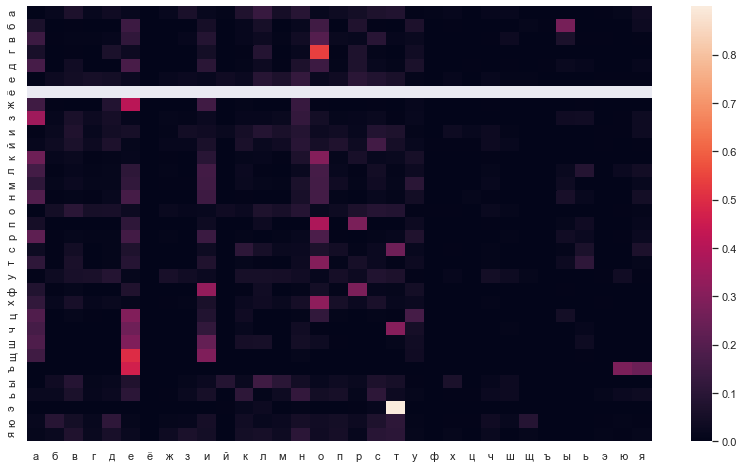

In [9]:
#Матрица переходных вероятностей
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

In [10]:
#Вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        if proba > 0:
            print(''.join(['п', c1, c2, 'р']), proba)

паар 2.5207649190691473e-07
пабр 2.2100055338680835e-06
павр 2.2364248211760067e-06
пагр 2.0368560468806e-06
падр 4.2978568154563506e-06
паер 3.275180970536732e-06
пажр 1.5489702095157818e-08
пазр 1.6416824160245962e-06
паир 5.580705698205104e-07
пайр 4.894280194377402e-07
пакр 6.700359564662764e-06
палр 1.0139942820946131e-06
памр 6.45975360035478e-07
панр 4.1933000945591e-07
паор 1.948642054928766e-06
папр 1.522862715316372e-05
парр 8.429879570147815e-08
паср 1.037046121052511e-06
патр 6.8221919616990695e-06
паур 3.3316088886209546e-07
пафр 3.917027805184137e-06
пахр 6.096567064423558e-07
пацр 4.296453469702874e-09
пачр 6.49649110891118e-08
пашр 1.7194566520466948e-08
пащр 7.2033459260607656e-09
паэр 3.758078821070711e-08
паюр 4.970424322646765e-07
паяр 8.588254847156067e-07
пбар 3.1236073795011473e-09
пббр 6.854825415865303e-11
пбвр 1.2860882177591123e-10
пбгр 5.5132992762454695e-11
пбдр 1.222421202605786e-10
пбер 1.4130040614324587e-08
пбжр 2.9200985656696497e-13
пбзр 4.20884185585

птюр 1.7070740977898644e-09
птяр 1.0373313841725978e-08
пуар 2.2805521467384213e-07
пубр 2.2167543779330505e-06
пувр 1.1100883899574163e-06
пугр 3.828342684274279e-06
пудр 5.48643682386982e-06
пуер 1.1655840166931223e-06
пужр 2.741255395765535e-08
пузр 5.983450046739235e-07
пуир 4.0764786791140593e-07
пуйр 1.0377948156099391e-07
пукр 2.675738926216642e-06
пулр 2.440783885568619e-07
пумр 3.8545548356084353e-07
пунр 1.0745570581598521e-07
пуор 9.84276335011229e-07
пупр 1.2736663018419368e-05
пурр 3.085275973423532e-08
пуср 6.316822182146702e-07
путр 3.3397898075770253e-06
пуур 1.292531193947738e-07
пуфр 4.308820846727155e-07
пухр 3.483114162021944e-07
пуцр 1.1274556453149295e-09
пучр 1.0519010952159271e-07
пушр 1.5945825002274336e-08
пущр 1.3614082396999105e-08
пуэр 1.9304964950174576e-08
пуюр 1.0592584415807091e-06
пуяр 7.258988615163254e-08
пфар 9.087015041029885e-08
пфбр 8.921739829875188e-09
пфвр 5.9057008414481476e-09
пфгр 2.8984624728694506e-09
пфдр 3.6621808071072836e-09
пфер 1.80

In [11]:
#Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы "Б" и имеющее длину 8-мь символов
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бываюикин


In [12]:
#Выберите ряд и оцените его через HMM. Попробуйте "построить" (через среднее каждой компоненты) наивный прогноз ряда.
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")["Count"]

In [13]:
values = series.values.reshape(-1,1)

In [14]:
model = GaussianHMM(n_components=20,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]

Fitting a model with 439 free scalar parameters with only 77 data points will result in a degenerate solution.


In [15]:
cur_value = labels[-1]
predictions = []
for _ in range(20):
    cur_value = np.random.choice(20, p=model.transmat_[cur_value])
    predictions.append(model.means_[cur_value])

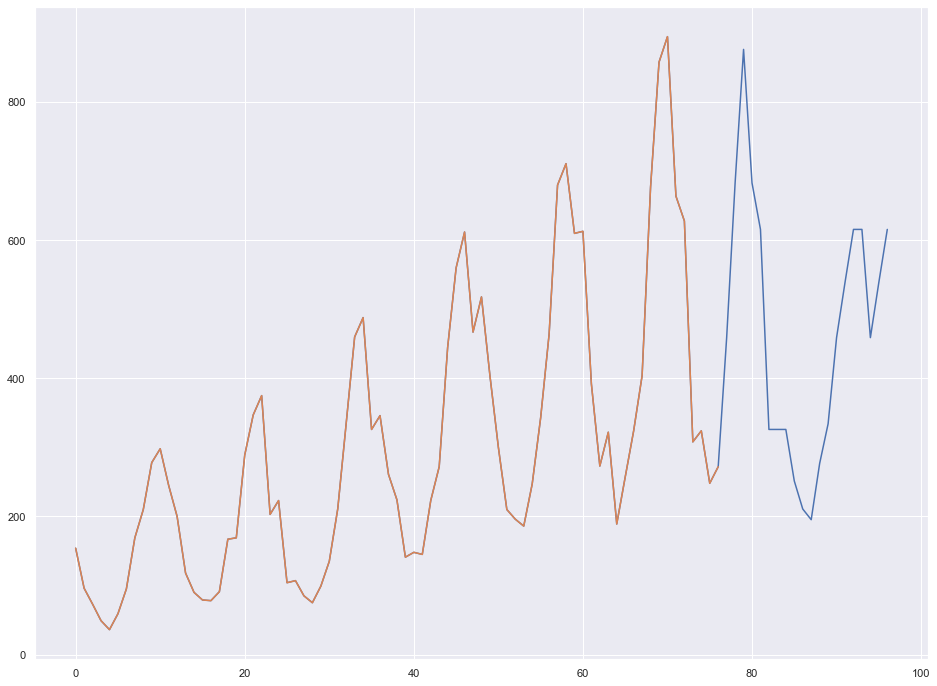

In [16]:
new_series = np.concatenate((values, np.array(predictions)))
plt.figure(figsize=(16,12))
plt.plot(new_series[-100:])
plt.plot(values[-90:])
plt.show()